![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – Travaux Dirigés N°1 Version allégée
</div>

# - ETUDE DE LA METHODE D'EULER EXPLICITE -
>Physique Chimie `CPGE PT` T.Roque
    >> lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/python.html </a>
       

Dans ce notebook, on rappelle le principe de la `méthode d'Euler explicite` pour pour intégrer une équation différentielle dont on se limite pour le moment au premier ordre. On verra plus tard, avec la `méthode d'Euler implicite`comment transformer une équation différentielle d'ordre 2 en 2 équations différentielles d'ordre 1.

<div class="alert alert-block alert-danger">
    <b> PREMIERE PARTIE, BASES THEORIQUES
</div>


La méthode d'Euler est la base de tout méthode d'intégration numérique d'équation différentielle.C'est une méthode d'intégration numérique rudimentaire et simple à mettre en œuvre. Il est donc important de la maîtriser avant d'explorer des situations plus complexes.
### Rappel de la méthode 
La méthode d'Euler explicite sert à intégrer une équation différentielle du premier ordre du type :
$$
\frac{\mathrm{d}y}{\mathrm{d}t} =a.y(t)+b 
$$
avec a et b constantes la plupart du temps et avec une condition de type : $$y(0)=y_{0}$$
où $f$ est une fonction qui dépend à la fois de la fonction inconnue $y(t)$ et de la variable temporelle $t$. 
La procédure consiste à interpréter la dérivée $\frac{\mathrm{d}y}{\mathrm{d}t}$ comme le rapport de la variation infinitésimale $\mathrm{d}y$ de la grandeur $y$ pendant la durée infinitéimale $\mathrm{d}t$. Donc $$
\frac{\mathrm{d}y}{\mathrm{d}t} \approx \frac{\mathrm y(t+{d}t)-\mathrm y(t)} {\mathrm{d}t} $$

Pour avancer dans le temps, il suffira d'y aller par "pas" temporel de durée $\mathrm{d}t$ et de calculer l'évolution de $y$ de proche en proche en utilisant à chaque fois la dernière valeur connue de $y$ au "rang précédent n" en $t$, ou encore "$y_n$ en $ t_n$" pour calculer la suivante, au "rang suivant", en $t + \mathrm{d}t$, ou encore "$y_{n+1}$ en $t_{n+1}$". 
  Donc on pourra remplacer dans notre équation 
    $ \frac{\mathrm{d}y}{\mathrm{d}t}$ par $  \frac{\mathrm y_{n+1}-\mathrm y_{n+1}} {\mathrm{d}t}$
    On pourra alors percevoir l'équation approchée précédente comme une `équation de récurrence` : 

> Démontrer que: $y_{n+1}=y_{n}*(1+a*{dt})+b*{dt} $

<div class="alert alert-block alert-danger">
    <b> EXEMPLE DE LA DECHARGE D'UN CONDENSATEUR
</div>

![RC.gif](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/554e0ed3a1cdf9bd97a437bb94f30185b3987717/RC.gif)


Supposons que E=10v et que l'interrupteur K est en position 1 depuis longtemps. A t=0, on le bascule en position 2, démontrer que $\frac{\mathrm{d}y}{\mathrm{d}t} = - \frac1\tau\,y$ avec $y(0) = 10$ et $\tau=R.C$. Résoudre l'équation de façon exacte. 

Si on choisit de trouver une solution numérique approchée avec la méthode d'Euler, on remarque que ici, on a simplement $f(y, t) = - \frac1\tau\,y$.
Il nous reste à : 
>- choisir $\mathrm{d}t$ suffisamment petit pour que les erreurs successives ne soient pas trop grandes 
>- stocker les valeurs des temps successifs et des valeurs correspondantes calculées de $y$ avec l'équation de récurrence
>- faire la représentation graphique et la comparer à la solution analytique exacte de l'équation différentielle 


> Démontrer que : $y_{n+1}=y_{n}*(1-\frac{dt}{\tau}) $

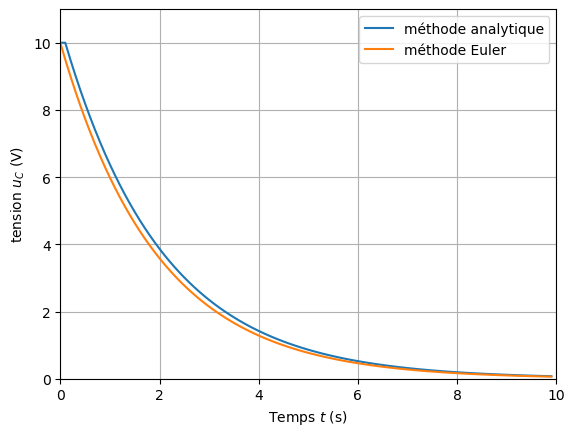

In [19]:
import matplotlib.pyplot as plt # Pour faire les courbes à la fin
import numpy as np              # Pour utiliser l'exponentielle

dt = 1e-1
tau= 2
tmax = 5 * tau # On va intégrer jusqu'à 5\tau
N = int((tmax) / dt) # Pour savoir le nombre de places à prévoir

# On impose les valeurs initiales
T = [0]
Y = [10]
Yth=[10]

for i in range(N-1):
    Y.append(Y[i]*(1-dt/tau))
    T.append(T[i] + dt) # Le temps s'incrémente aussi d'un pas
    Yth.append(10*np.exp(-T[i]/tau)) # On peut à présent représenter notre solution ainsi que la solution
                                    # connue du cours en 10 * exp(-t/tau)


plt.plot(T, Yth, label = 'méthode analytique')
plt.plot(T, Y, label = 'méthode Euler')
plt.xlabel('Temps $t$ (s)')
plt.ylabel('tension $u_C$ (V)')
plt.xlim(0, tmax)
plt.ylim(0, 1.1*10)
plt.grid()
plt.legend()
plt.show()

On voit qu'avec ce pas de temps, les deux versions sont très proches, même si on voit une différence au début qui montre que l'intégration par Euler a tendance à surestimer la baisse de $y$, mais dans l'ensemble, c'est acceptable d'autant qu'on tend vers une constante (ici nulle).

<div class="alert alert-block alert-danger">
    <b> A VOUS DE CODER : CHARGE DU CONDENSATEUR
</div>

Supposons le condensateur déchargé et basculons l'interrupteur en position 1. Démontrer que :
$$
\frac{\mathrm{d}y}{\mathrm{d}t} + \frac{1}\tau\,y = \frac{E}{\tau}
$$
avec la condition initiale $y(0) = 0$.

On impose les valeurs de `dt`,  `tmax`, `tau` et `E`. À vous d'adapter de terminer le code
Vous mettrez dans la variable `reponse` (SANS ACCENT) à la fois la valeur de $y$ en $t=t_0 + \tau$ et $t=t_0 + 5\tau$.

In [ ]:
import numpy as np              # Pour avoir des np.array
import matplotlib.pyplot as plt # Pour faire les courbes à la fin
E=10
tau=5
tmax=25
dt=0.01
t0 = 0
y0 = 0
N = int((tmax-t0) / dt) # Pour savoir le nombre de places à prévoir
...
...
...
...

>- Superposez sur la même courbe différentes charges avec des $\tau$ différents
>- Réalisez une charge à 10Volts alors que le condensateur est encore chargé, au temps initial, à 1 Volt
>- Recommencez l'exercice en utilisant des listes plutôt que des tableaux